**Lineer** **regresyon**

In [108]:
import numpy as np
import torch

In [109]:
#requires_grad=True
#türev alınabilir olduğunu belirtmemize olanak sağlıyor.
x=torch.tensor(3.)
w=torch.tensor(4.,requires_grad=True)
b=torch.tensor(5.,requires_grad=True)
print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


In [110]:
y=w*x+b
print(y)
#backward çagırdım türevlerinin alıp eğimlerini buldu. 
y.backward()
#türev alma işlemi
print("dy/dw: " ,w.grad) # y=wx+b> x =3
print("dy/db: " ,b.grad) #y=wx+b> 1

tensor(17., grad_fn=<AddBackward0>)
dy/dw:  tensor(3.)
dy/db:  tensor(1.)


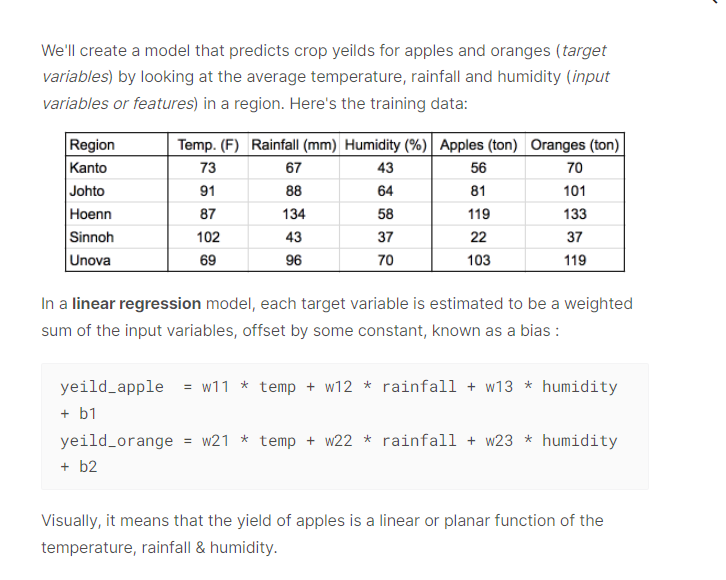

uygun ağırlık ve biases(y eksenini kestiği değer) denklemimizdeki katsayıları bulup en az hatalı tahminin yapma


In [111]:
#input(temp,rainfall,humidity)
inputs=np.array([[73,67,43],
                [91,88,64],
                [87,134,58],
                [102,43,37],
                [69,96,70]],dtype='float32')

#Targets(apples,oranges)

targets=np.array([[56,70],
                  [81,101],
                  [119,133],
                  [22,37],
                  [103,119]],dtype='float32')



In [112]:
#torch array haline çevirme işlemini gerçekleştirdik.
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [113]:
#belirli olan w ve b değerlerinin hesaplama
w=torch.randn(2,3,requires_grad=True)
b=torch.randn(2,requires_grad=True)

print(w)
print(b)


tensor([[ 2.4619, -0.6381,  1.0897],
        [ 0.6097, -1.3515,  0.9280]], requires_grad=True)
tensor([0.8528, 0.6141], requires_grad=True)


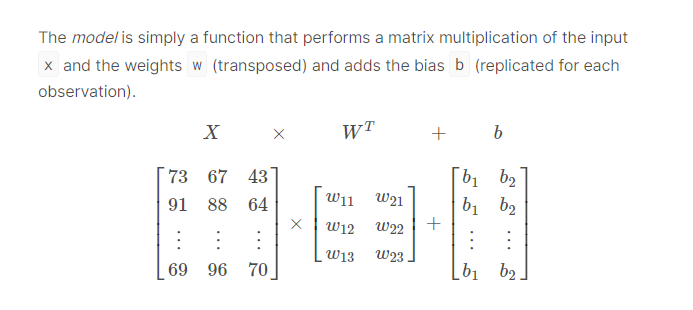

In [114]:
#Tahmini oluşturcak modelimiz
def model(x):
    return x @ w.t() +b

#rastgele değerlerimize göre tahmin

preds=model(inputs)
print(preds)

tensor([[184.6777,  -5.5292],
        [238.4761,  -3.4497],
        [192.7367, -73.6274],
        [264.8499,  39.0210],
        [185.7472, -22.1074]], grad_fn=<AddBackward0>)


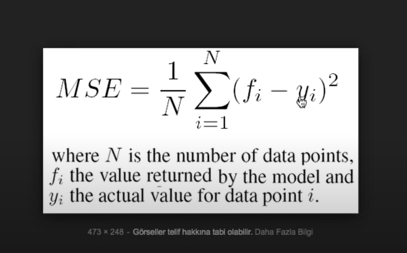

kayıp fonk


In [115]:
#hatanın yüksek olduğunu modele söyleyip kendini güncellemesini sağlamam lazım.

def mse(real,preds):
  diff=real-preds
  return torch.sum(diff*diff)/diff.numel()

In [116]:
loss=mse(targets,preds)
print(loss)

tensor(19184.1621, grad_fn=<DivBackward0>)


In [117]:
#türev alarak kayıp fonk minimize etmek istiyorum. 
loss.backward()



In [118]:
print(w)
print(w.grad)
print('*************************')
print(b)
print(b.grad)

tensor([[ 2.4619, -0.6381,  1.0897],
        [ 0.6097, -1.3515,  0.9280]], requires_grad=True)
tensor([[ 12123.8291,  10149.2598,   6933.2188],
        [ -8505.0820, -11079.9023,  -6343.9336]])
*************************
tensor([0.8528, 0.6141], requires_grad=True)
tensor([ 137.0975, -105.1385])


kayıp fonk türev aldık, sıfır olduğu yerlerde local yada global bir optimada oluruz. türev alarak burdaki optimalardan birinde durmak isteriz.

In [119]:
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [120]:
preds=model(inputs)
print(preds)
loss=mse(targets,preds)
print(loss)
loss.backward()
#ben hayır diyene kadar sürekli türev al'ı ifade eder.
with torch.no_grad():
  w -=w-w.grad * 1e-5
  b-=b-b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()
 
#138,5063
 


tensor([[184.6777,  -5.5292],
        [238.4761,  -3.4497],
        [192.7367, -73.6274],
        [264.8499,  39.0210],
        [185.7472, -22.1074]], grad_fn=<AddBackward0>)
tensor(19184.1621, grad_fn=<DivBackward0>)


In [121]:
print(w)

tensor([[ 0.1212,  0.1015,  0.0693],
        [-0.0851, -0.1108, -0.0634]], requires_grad=True)


In [122]:
preds=model(inputs)
loss=mse(targets,preds)
print(loss)
#94,5304

tensor(8936.9277, grad_fn=<DivBackward0>)


In [124]:
for i in range(1000):
  preds=model(inputs)
  loss=mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w -=w.grad * 1e-5
    b-= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [125]:
preds=model(inputs)
loss=mse(targets,preds)
print(loss)
#1,92

tensor(3.7173, grad_fn=<DivBackward0>)


In [127]:
targets


tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [128]:
preds

tensor([[ 57.2905,  70.4922],
        [ 81.2165,  99.1901],
        [120.7441, 136.0302],
        [ 21.7016,  37.9164],
        [ 99.8355, 116.0375]], grad_fn=<AddBackward0>)